# Name: Mondal Sudipta Jayanta
# Class: BE-B
# Roll No: B212012

## Pratical-3 : Given a bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months. Dataset Description: The case study is from an open-source dataset from Kaggle.The dataset contains 10,000 sample points with 14 distinct features such asCustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
## Perform following steps:
## 1. Read the dataset.
## 2. Distinguish the feature and target set and divide the data set into training and test sets.
## 3. Normalize the train and test data.
## 4. Initialize and build the model. Identify the points of improvement and implement the same.
## 5. Print the accuracy score and confusion matrix (5 points).

### Import the libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\HP\\Desktop\\ML\\Practical 3\\Churn_Modelling.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.shape

(10000, 14)

### Spliting the data

In [8]:
x = df.drop(["RowNumber","CustomerId","Surname","Geography","Gender","Exited"],axis=1)

In [9]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [10]:
y = df["Exited"]

In [11]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

### Checking Balancing of data

<Axes: xlabel='Exited', ylabel='count'>

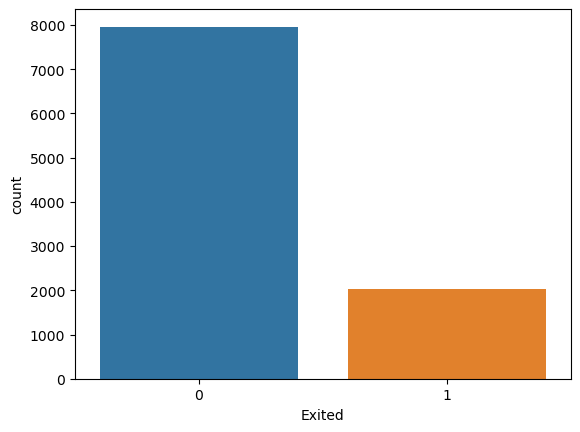

In [12]:
sns.countplot(x=y)

In [13]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

### Feature scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [15]:
X_scale= sc.fit_transform(x)

In [16]:
X_scale

array([[0.538     , 0.32432432, 0.2       , ..., 1.        , 1.        ,
        0.50673489],
       [0.516     , 0.31081081, 0.1       , ..., 0.        , 1.        ,
        0.56270874],
       [0.304     , 0.32432432, 0.8       , ..., 1.        , 0.        ,
        0.56965435],
       ...,
       [0.718     , 0.24324324, 0.7       , ..., 0.        , 1.        ,
        0.21039009],
       [0.844     , 0.32432432, 0.3       , ..., 1.        , 0.        ,
        0.46442905],
       [0.884     , 0.13513514, 0.4       , ..., 1.        , 0.        ,
        0.19091423]])

### Cross Validation

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X_scale,y, random_state=12,test_size=0.12)

In [18]:
X_train.shape

(8800, 8)

In [19]:
X_test.shape

(1200, 8)

### Initialize and build the model

In [20]:
from sklearn.neural_network import MLPClassifier
ann=MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=100,activation="relu",random_state=12)

In [21]:
ann.fit(X_train, Y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=12)

In [22]:
y_pred = ann.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report


In [24]:
accuracy_score(Y_test,y_pred)

0.8625

In [25]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       944
           1       0.82      0.45      0.58       256

    accuracy                           0.86      1200
   macro avg       0.85      0.71      0.75      1200
weighted avg       0.86      0.86      0.85      1200



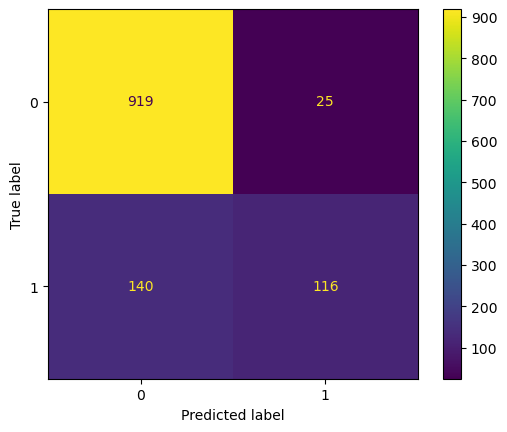

In [26]:
ConfusionMatrixDisplay.from_predictions(Y_test,y_pred)

In [27]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [28]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

In [29]:
x_bal,y_bal = ros.fit_resample(x,y)

<Axes: xlabel='Exited', ylabel='count'>

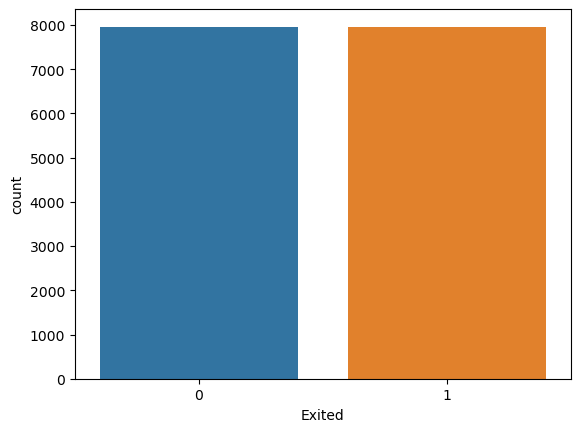

In [30]:
sns.countplot(x=y_bal)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(x_bal,y_bal, random_state=0,test_size=0.25)

In [32]:
X_train.shape

(11944, 8)

In [33]:
X_test.shape

(3982, 8)

In [34]:
from sklearn.neural_network import MLPClassifier
ann=MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=100,activation="relu",random_state=0)

In [35]:
ann.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [36]:
y_pred = ann.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report

In [38]:
accuracy_score(Y_test,y_pred)

0.5379206428930186